<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador/blob/main/Programa_conteo_y_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow # para visualizar imágenes
import matplotlib.pylab as plt
import pandas as pd

# Conteo de objetos

Usted debe desarrollar una algoritmo que indique la cantidad de elementos de cada color en una imagen.



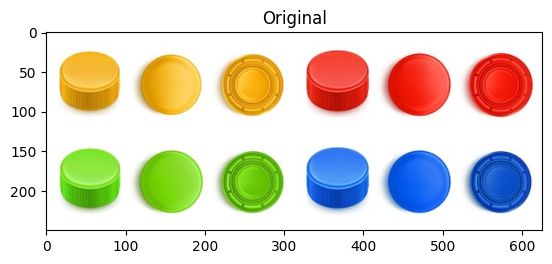

In [2]:
URL = 'https://img.freepik.com/vector-gratis/tapon-plastico-colorido-botellas-cerveza-soda-agua_107791-16233.jpg?size=626&ext=jpg'
img = io.imread(URL)
plt.imshow(img)
plt.title('Original');

Se propone desarrollar una solución bajo el siguiente esquema.

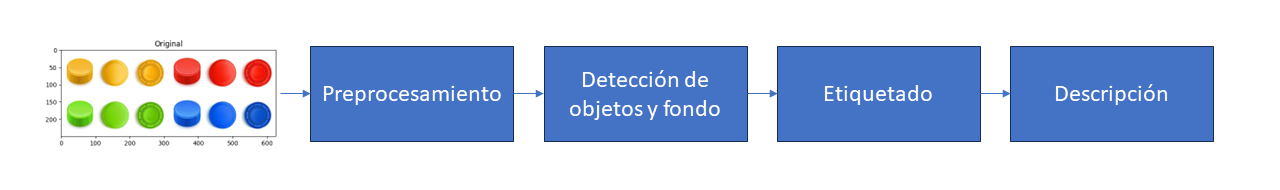

## Preprocesamiento

- Se pasa a niveles de gris
- Se filtra
- Se mejora contraste
- Se corrige iluminación dispareja
- Aplicar Operaciones Morfologicas
- ¿Otras?


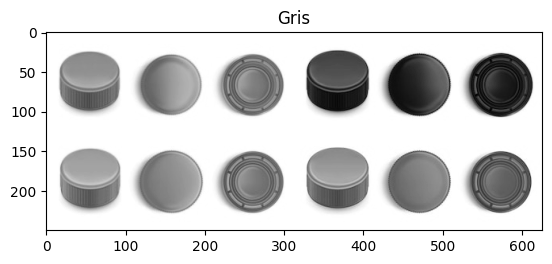

In [3]:

imgGris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(imgGris,'gray')
plt.title('Gris');


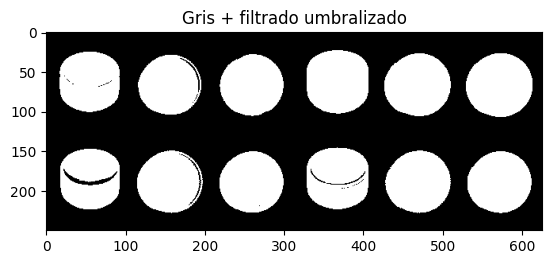

In [4]:
_, imgUmbral = cv.threshold(imgGris,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imgUmbral = 255 - imgUmbral
plt.imshow(imgUmbral,'gray')
plt.title('Gris + filtrado umbralizado');

Para mejorar las imagenes halladas con los diferententes detectores de bordes o objeos para mejorar la calidad de las iamgenes
se pueden usar tecnicas MORFOLOGICAS
- Erocion
- dilatacion
- Apertura
- Cerradura oclosing

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

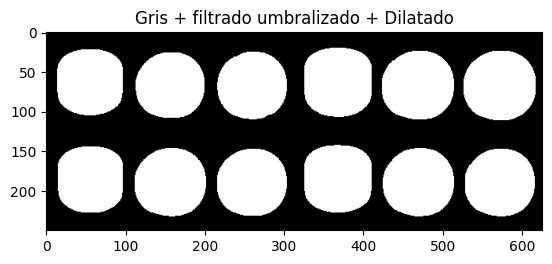

In [5]:
kernel = np.ones((8,8),np.uint8)
erosion = cv.erode(imgUmbral,kernel,iterations = 1)
dilation = cv.dilate(imgUmbral,kernel,iterations = 1)
# plt.imshow(erosion,'gray')
# plt.title('Gris + filtrado umbralizado + Erocionado');
plt.imshow(dilation,'gray')
plt.title('Gris + filtrado umbralizado + Dilatado');

## Etiquetado

Cada región detectada se describe. Observe que el método de etiquetado `cv.connectedComponentsWithStats` devuelve parte de la información asociada a cada región.

¿Qué devuelve `cv.connectedComponentsWithStats`?

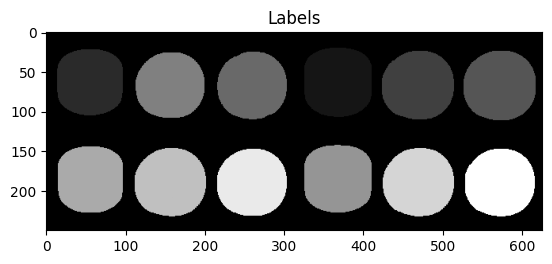

In [6]:
num_labels, imgLabels, stats, centroids = cv.connectedComponentsWithStats(dilation,connectivity=4)#con píxeles conectados
plt.imshow(imgLabels.astype('uint8'),'gray')
plt.title('Labels');


In [7]:
num_labels

13

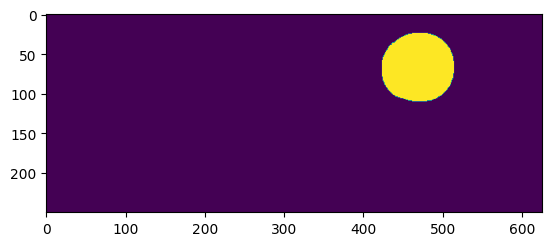

In [8]:
plt.imshow(imgLabels==3)

En el siguiente código se agrupa la información en un dataframe y se consulta el nivel de cada banda en el píxel central de cada región.

- Encuentre una forma para averiguar qué color tiene cada región

In [9]:
zonas = pd.DataFrame(columns = [['label','centroidF','centroidC']])
N = range(imgLabels.max())
temp = zonas.copy()
for L in N:
  regionL = np.where(imgLabels == L,1,0)
  temp['label'] = [L]
  temp['centroidC'] = [round(centroids[L,0])]
  temp['centroidF'] = [round(centroids[L,1])]
  temp['R en centroide'] = img[temp['centroidF'],temp['centroidC'],0]
  temp['G en centroide'] = img[temp['centroidF'],temp['centroidC'],1]
  temp['B en centroide'] = img[temp['centroidF'],temp['centroidC'],2]
  zonas = pd.concat([zonas,temp],axis = 0)
zonas = zonas.reset_index().drop(columns='index')
zonas

<ipython-input-9-c6609e75c4af>:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  zonas = zonas.reset_index().drop(columns='index')


,label,centroidF,centroidC,R en centroide,G en centroide,B en centroide
0,0,122,308,255.0,255.0,255.0
1,1,63,368,247.0,86.0,78.0
2,2,63,55,248.0,197.0,80.0
3,3,68,469,246.0,39.0,21.0
4,4,68,572,253.0,36.0,19.0
5,5,68,260,253.0,179.0,20.0
6,6,68,156,247.0,194.0,52.0
7,7,185,368,78.0,153.0,244.0
8,8,186,56,152.0,234.0,87.0
9,9,190,157,124.0,216.0,19.0


Ajuste su código para entregar las cantidades de cada color en un diccionario.

In [10]:
color_counts = {'rojo': 0, 'verde': 0, 'azul': 0, 'amarillo': 0}


{'rojo': 0, 'verde': 0, 'azul': 0, 'amarillo': 0}


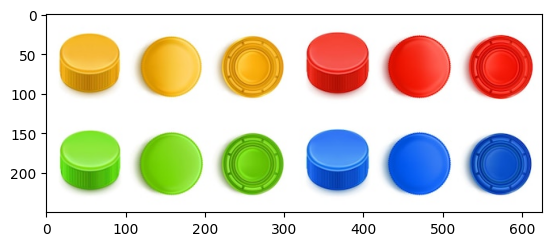

In [11]:
plt.imshow(img)
print(color_counts)

- Encuentre el área de cada región.

# Ejercicio

Encuentre cuántos granos maduros hay en esta imagen.
 URL https://scontent.feoh1-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=2ydYZlKyBZQQ7kNvgFNplw_&_nc_ht=scontent.feoh1-1.fna&oh=00_AYCbJEBfA2Y9Rh3ox1gN92_UHFXIb8RQ8oXkJ05mnUW3PA&oe=667E7FC5

 Tome el código elaborado antes como base.


![https://scontent.feoh1-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=2ydYZlKyBZQQ7kNvgFNplw_&_nc_ht=scontent.feoh1-1.fna&oh=00_AYCbJEBfA2Y9Rh3ox1gN92_UHFXIb8RQ8oXkJ05mnUW3PA&oe=667E7FC5](https://scontent.feoh1-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=2ydYZlKyBZQQ7kNvgFNplw_&_nc_ht=scontent.feoh1-1.fna&oh=00_AYCbJEBfA2Y9Rh3ox1gN92_UHFXIb8RQ8oXkJ05mnUW3PA&oe=667E7FC5)

Recomendación:
Enfóquese solamente en la bandeja de cerezómetro. Puede recortar la imagen a las coordenada apropiadas.`

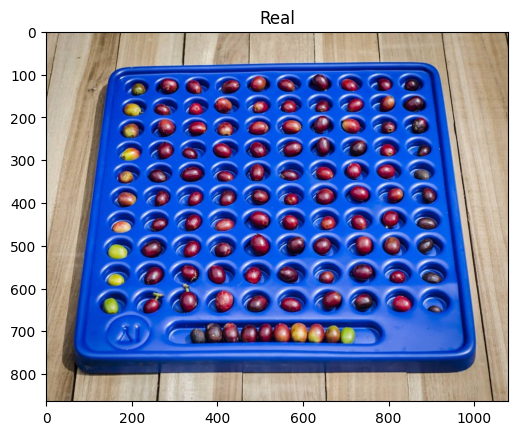

In [12]:
URLCafe = 'https://scontent.feoh1-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=2ydYZlKyBZQQ7kNvgFNplw_&_nc_ht=scontent.feoh1-1.fna&oh=00_AYCbJEBfA2Y9Rh3ox1gN92_UHFXIb8RQ8oXkJ05mnUW3PA&oe=667E7FC5'
imgreal = io.imread(URLCafe)
plt.imshow(imgreal)
plt.title('Real');

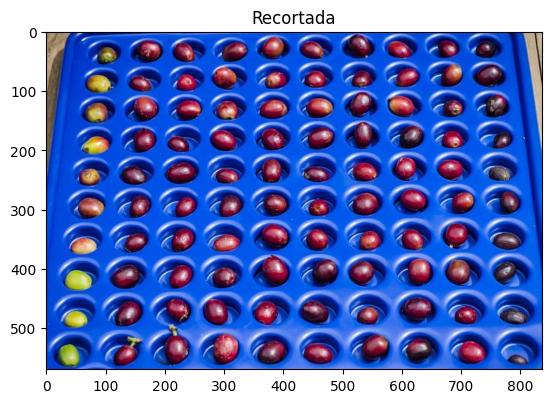

In [37]:
URLCafe = 'https://scontent.feoh1-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=2ydYZlKyBZQQ7kNvgFNplw_&_nc_ht=scontent.feoh1-1.fna&oh=00_AYCbJEBfA2Y9Rh3ox1gN92_UHFXIb8RQ8oXkJ05mnUW3PA&oe=667E7FC5'
imgreal = io.imread(URLCafe)
imagerecortada = imgreal[95:665,113:950]
plt.imshow(imagerecortada)
plt.title('Recortada');

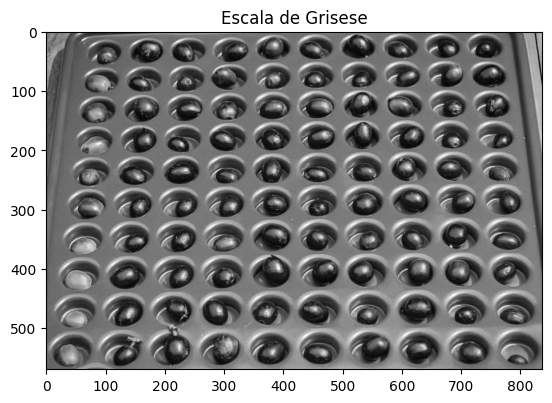

In [38]:
imgGriscafe = cv.cvtColor(imagerecortada, cv.COLOR_BGR2GRAY)
plt.imshow(imgGriscafe,'gray')
plt.title('Escala de Grisese');

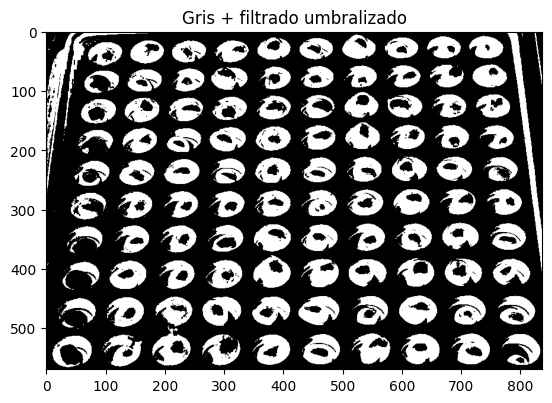

In [39]:

_, imgUmbralcafe = cv.threshold(imgGriscafe,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imgUmbralcafe = 255 - imgUmbralcafe
plt.imshow(imgUmbralcafe,'gray')
plt.title('Gris + filtrado umbralizado');

In [34]:
# filtro01 = np.array([[255,0,255],
#                      [255,0,255],
#                      [254,0,255]
#                      ])
# filtro02 = np.array([[255,255,255],
#                      [0,0,0],
#                      [255,255,255]
#                      ])

# imgUmbralcafe = cv.filter2D(imgUmbralcafe,cv.CV_64F, filtro01)+cv.filter2D(imgUmbralcafe,cv.CV_64F, filtro02)
# plt.imshow(imgUmbralcafe,'gray')
# plt.title('Gris + filtrado umbralizado');

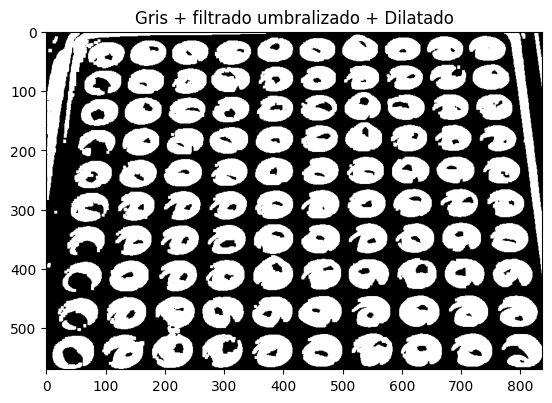

In [40]:
kernel = np.ones((2,2),np.uint8)
erosioncafe = cv.erode(imgUmbralcafe,kernel,iterations = 1)
dilationcafe = cv.dilate(imgUmbralcafe,kernel,iterations = 4)

# plt.imshow(erosioncafe,'gray')
# plt.title('Gris + filtrado umbralizado + Erocionado');
plt.imshow(dilationcafe,'gray')
plt.title('Gris + filtrado umbralizado + Dilatado');

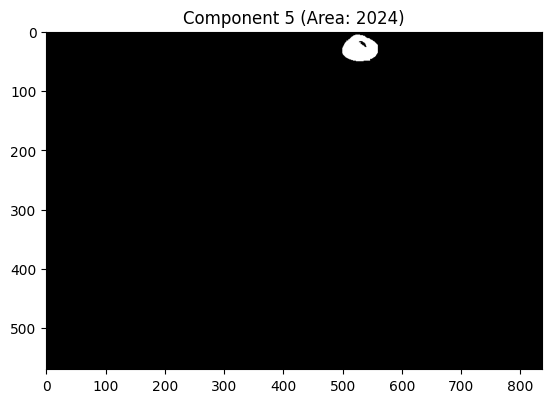

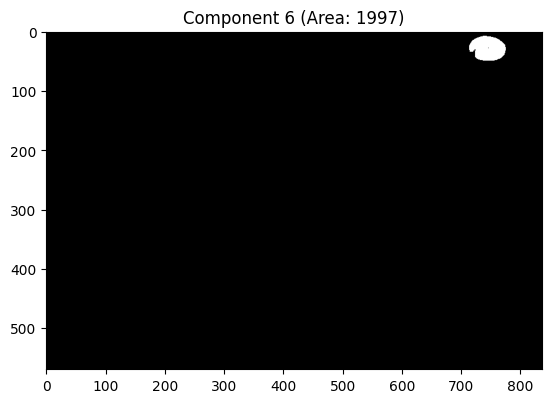

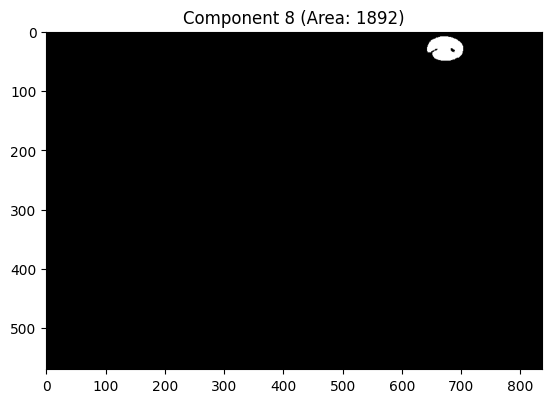

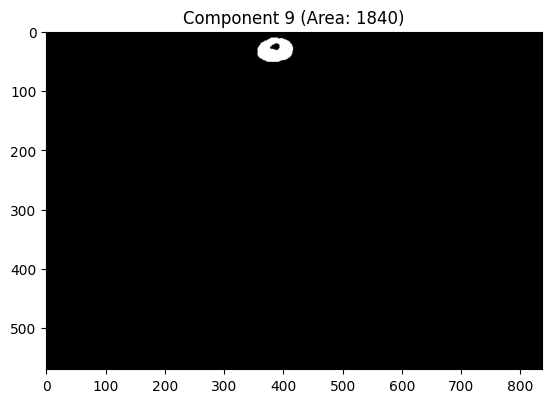

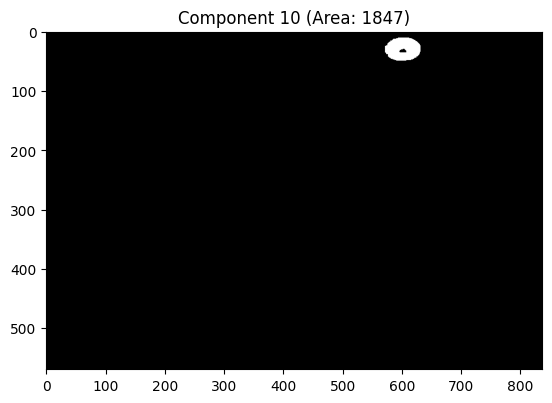

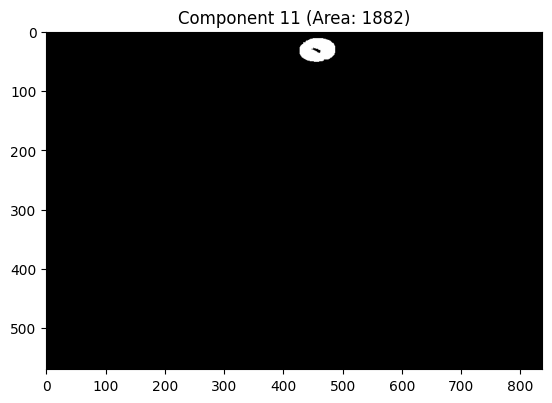

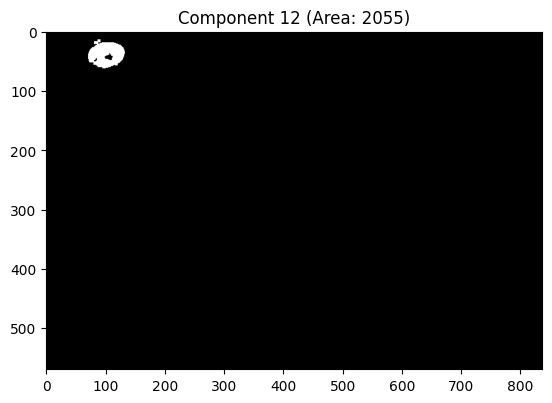

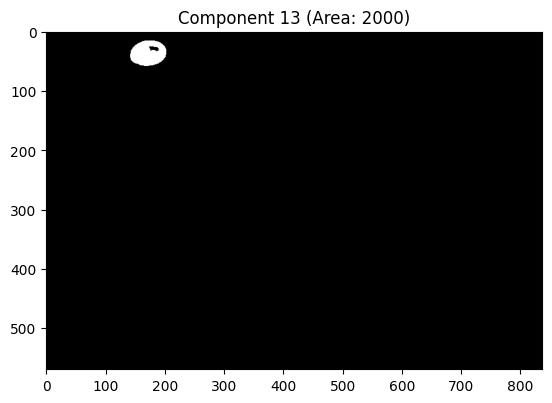

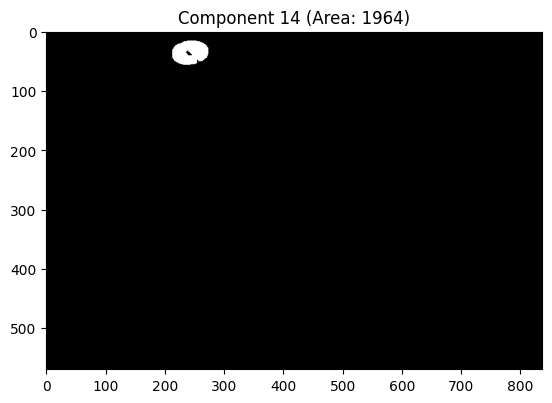

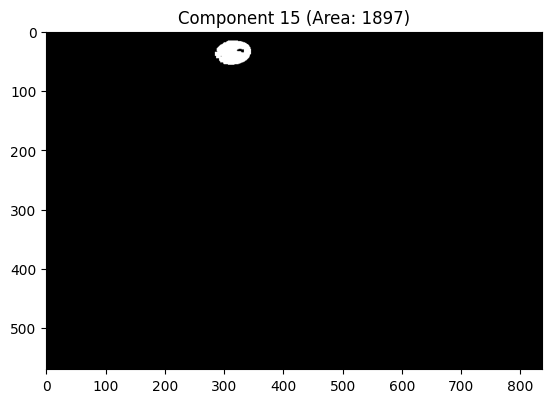

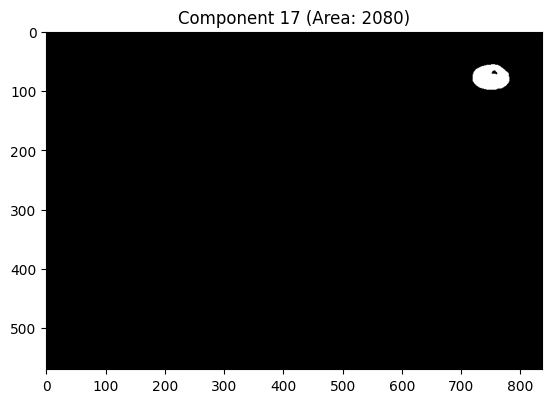

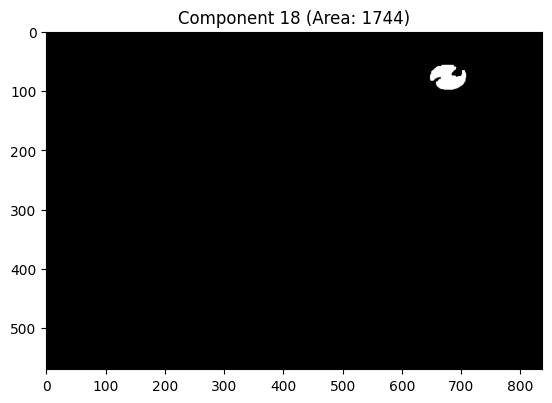

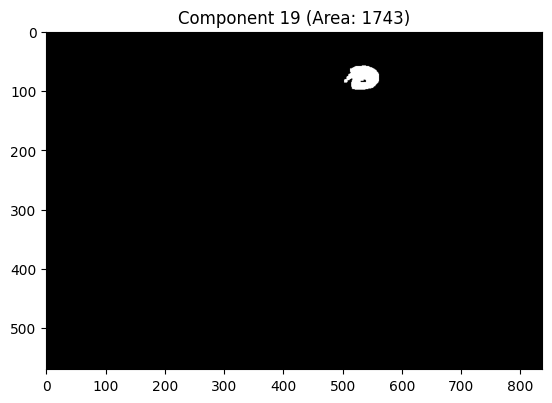

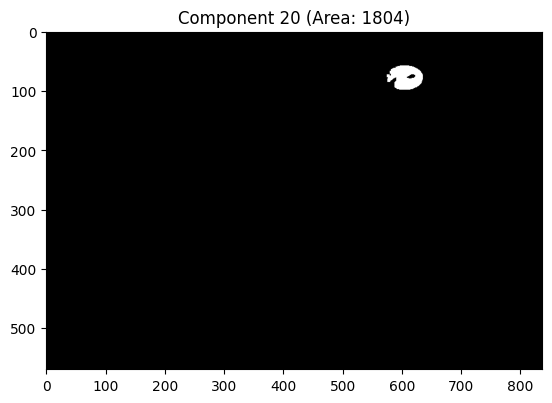

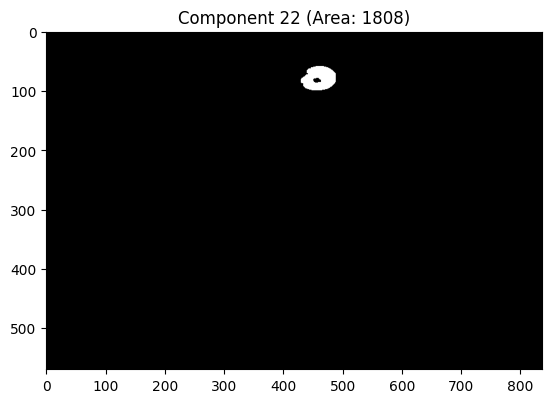

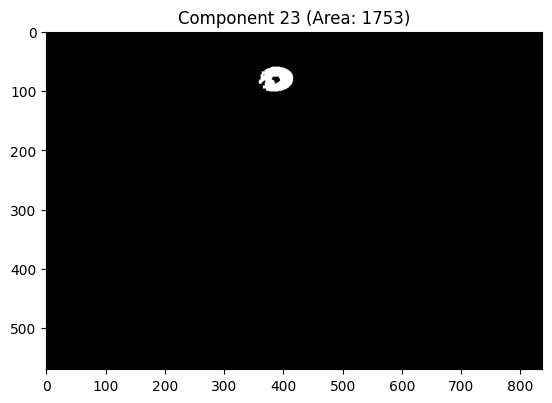

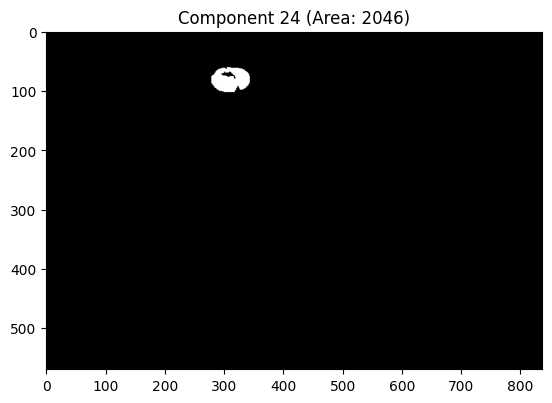

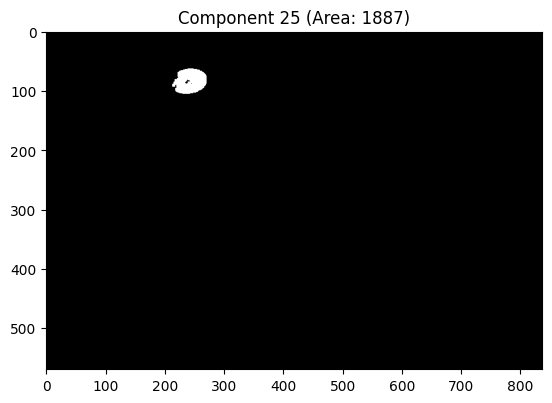

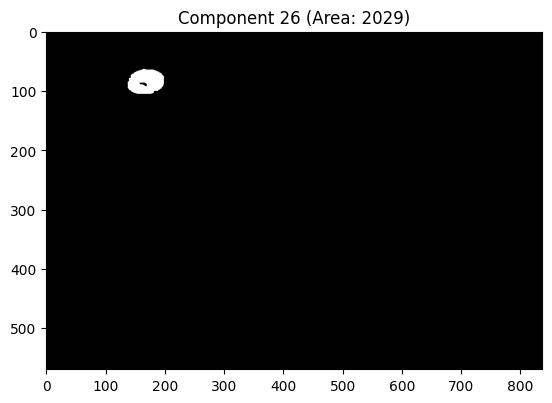

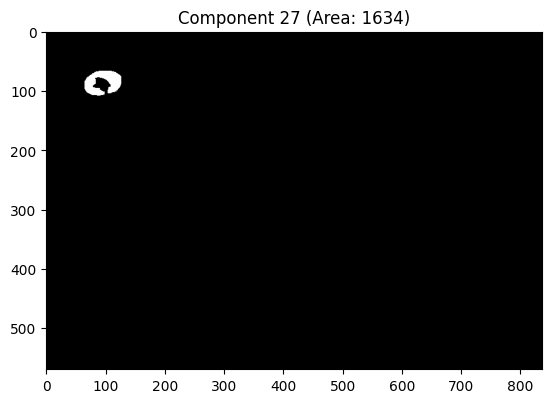

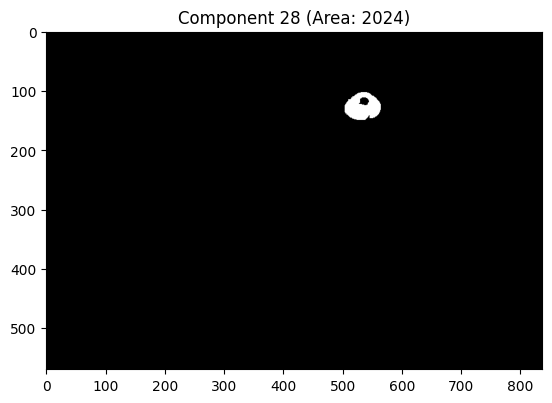

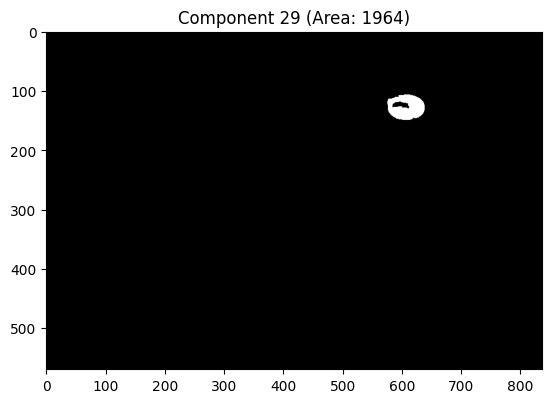

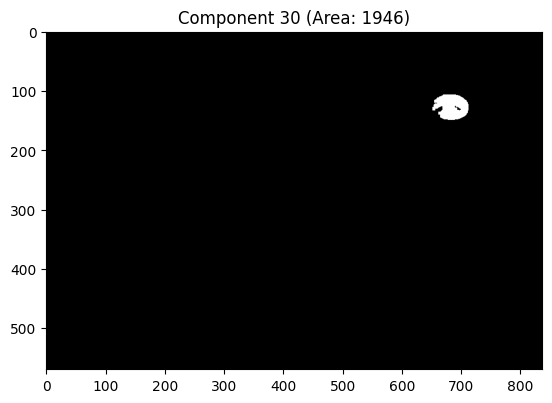

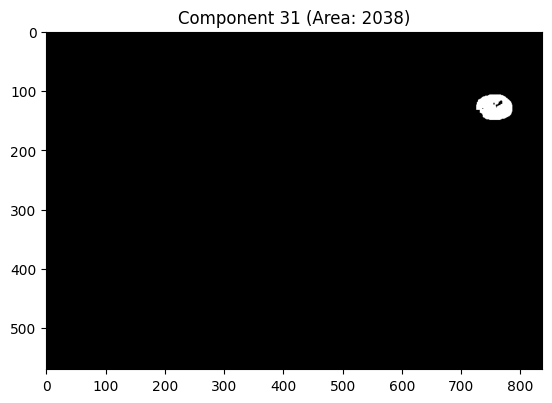

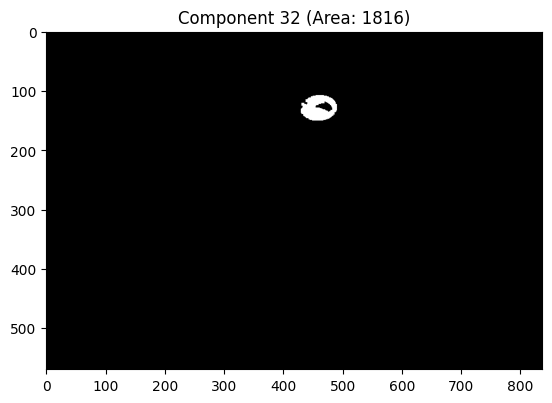

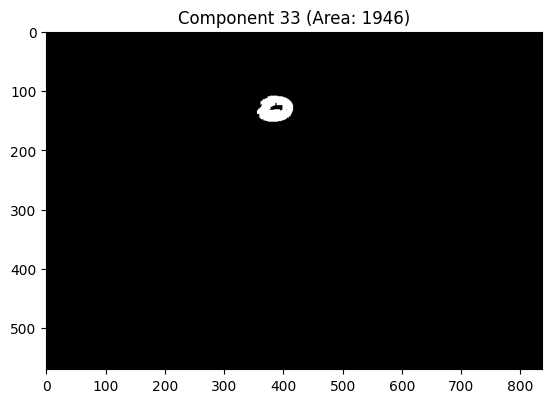

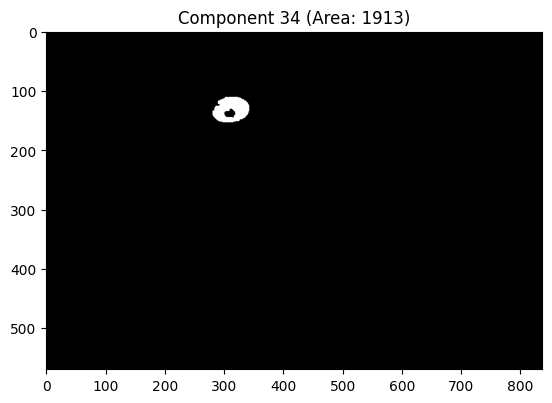

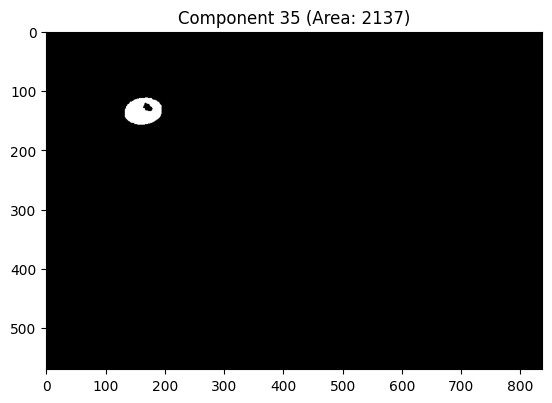

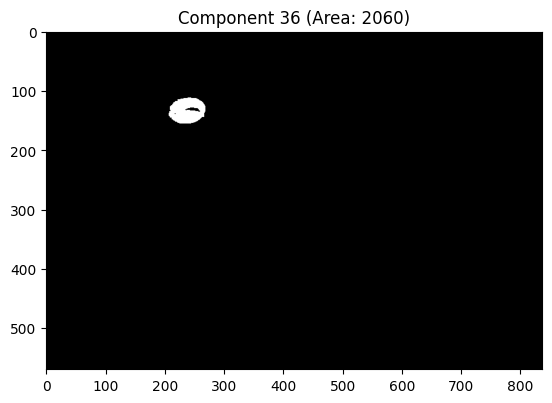

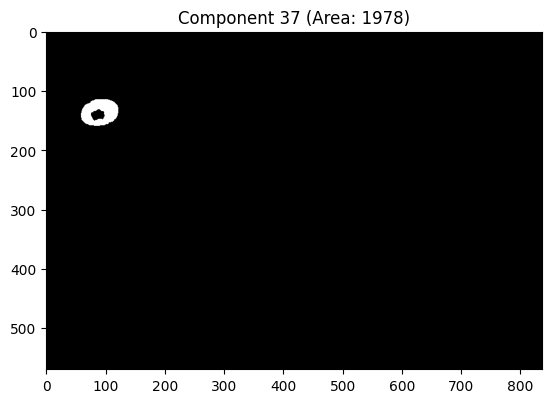

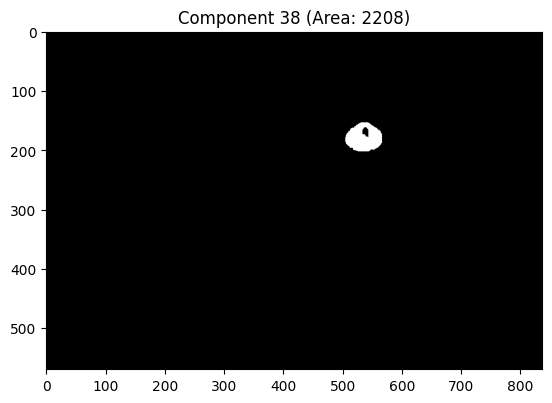

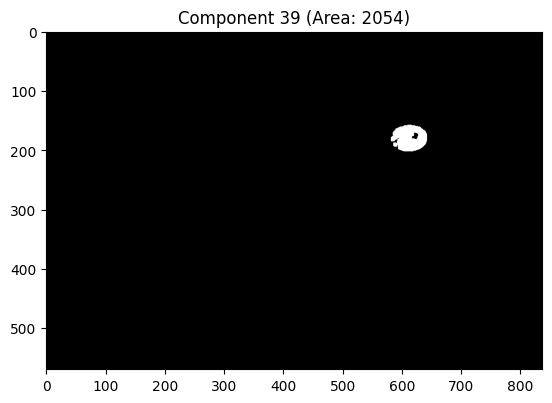

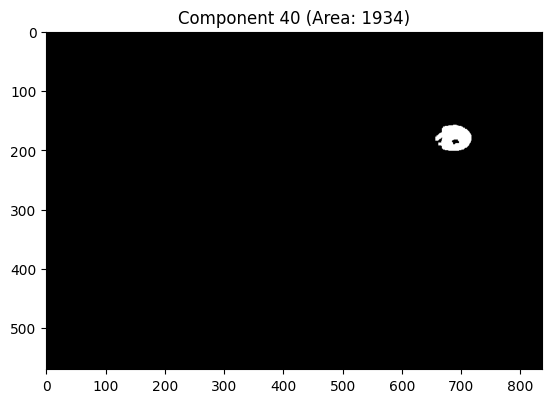

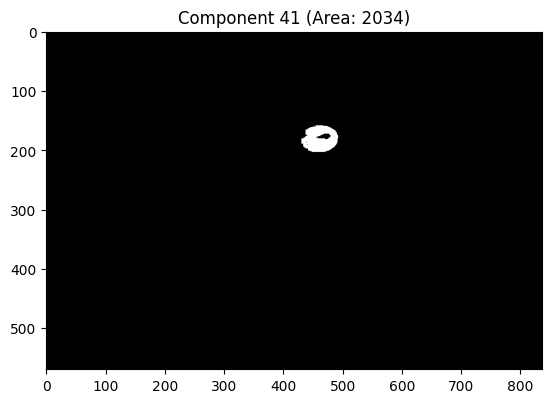

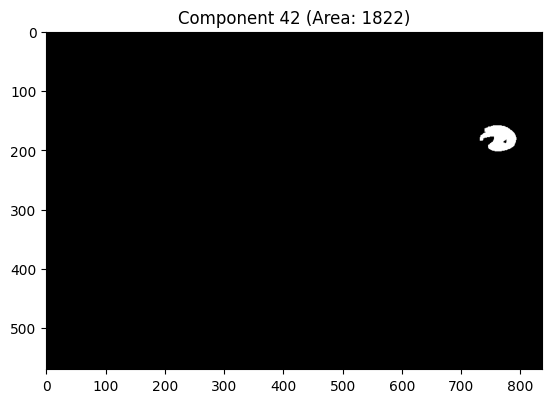

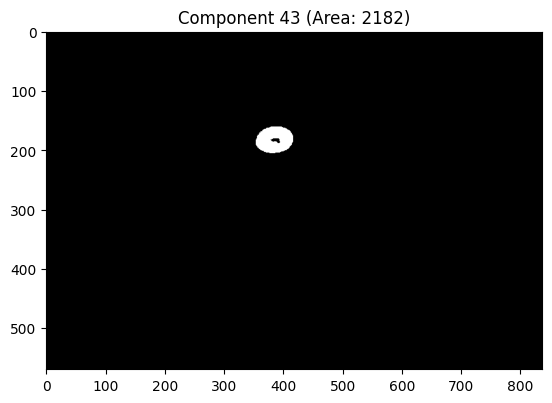

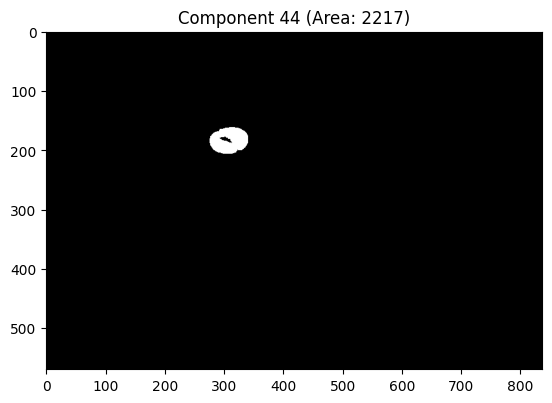

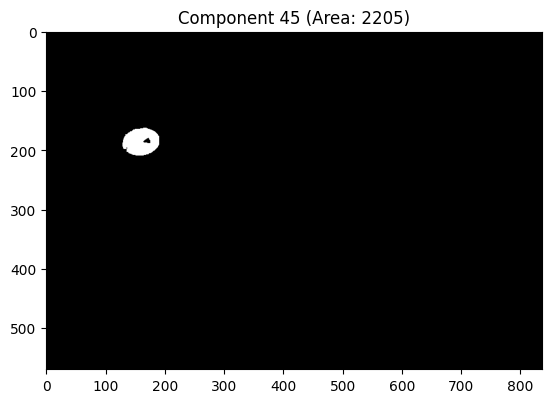

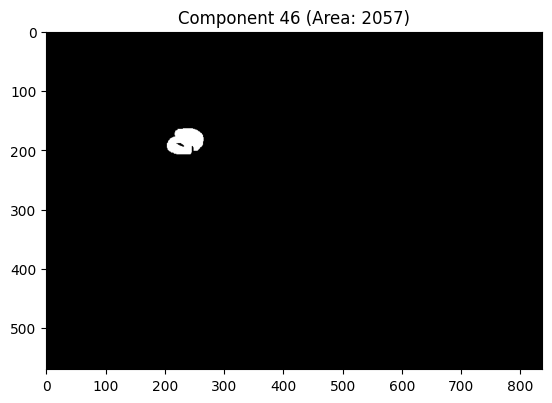

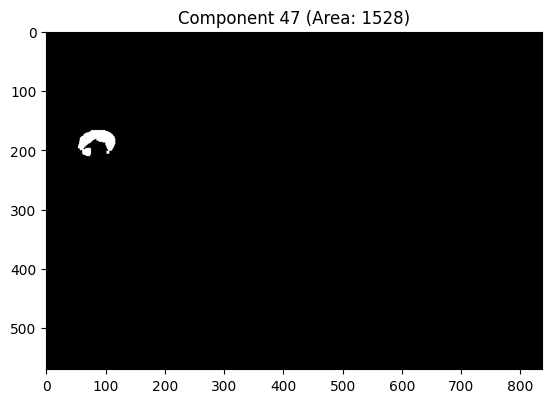

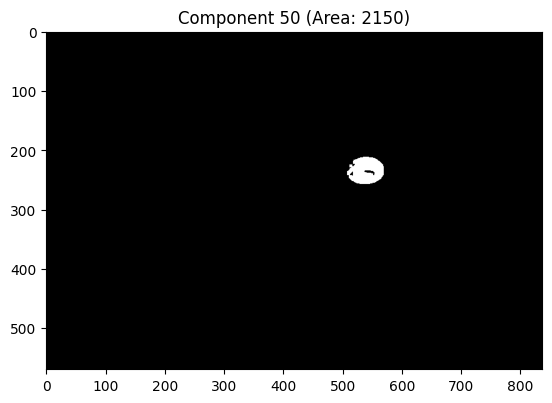

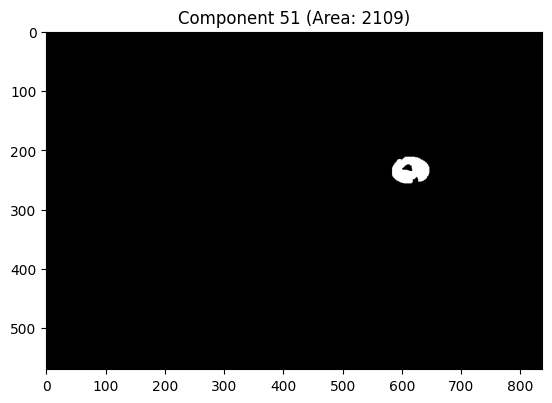

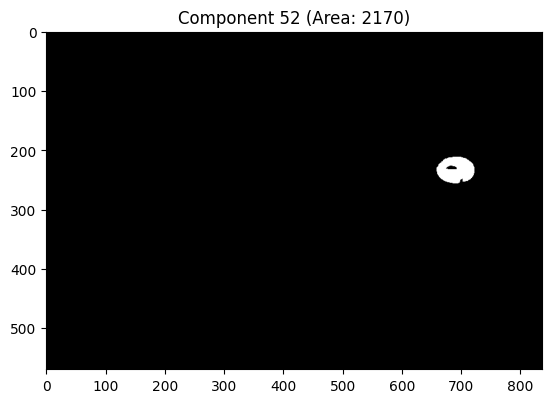

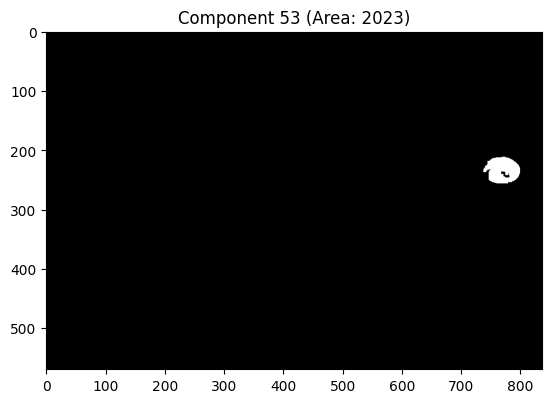

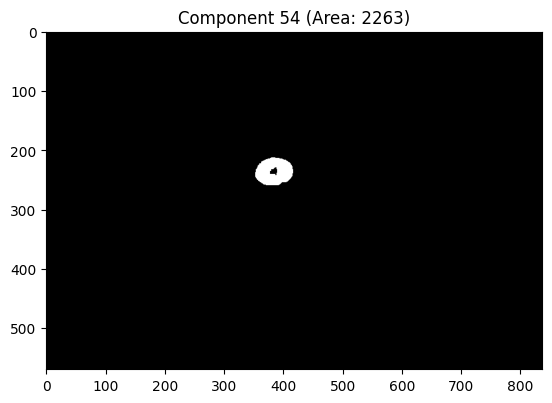

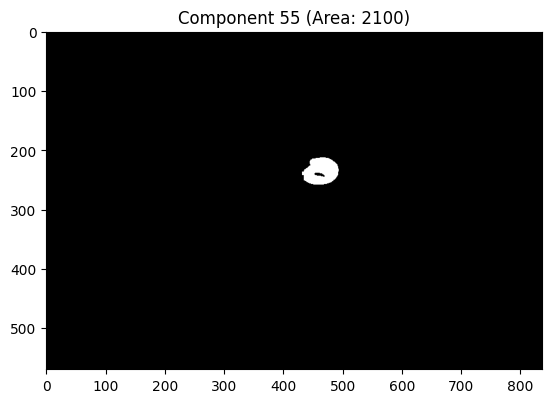

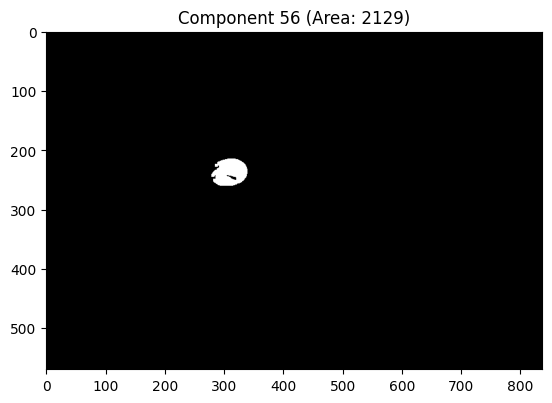

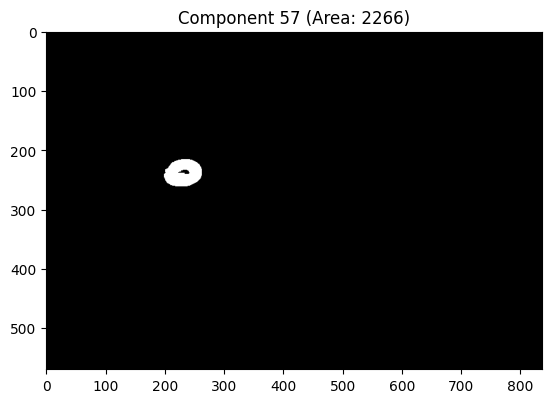

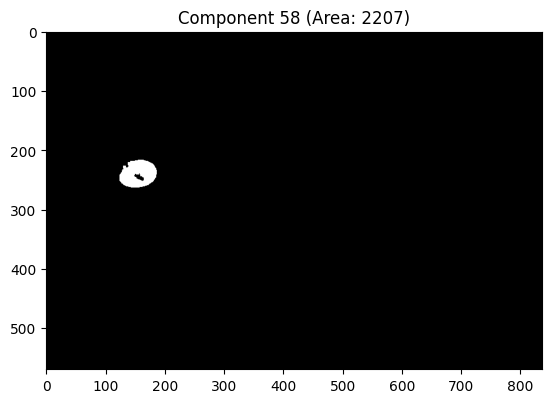

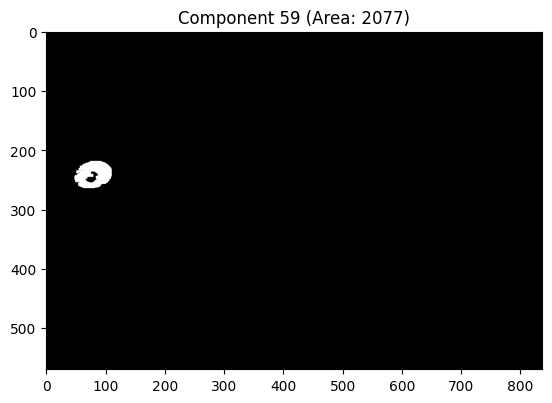

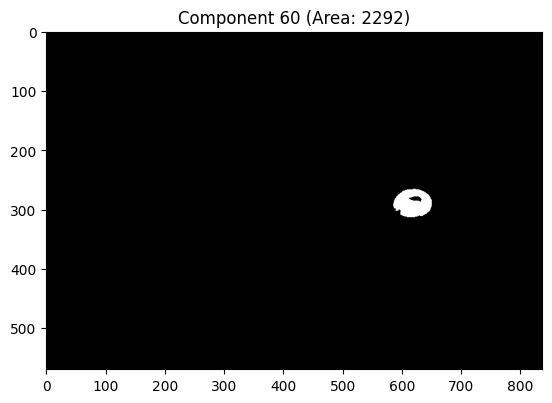

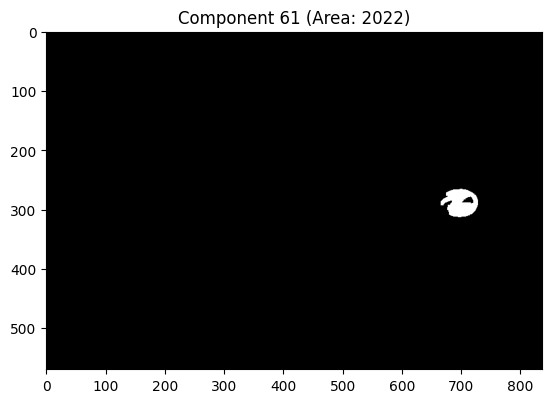

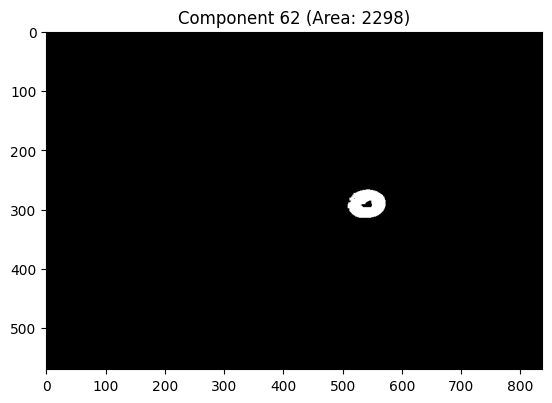

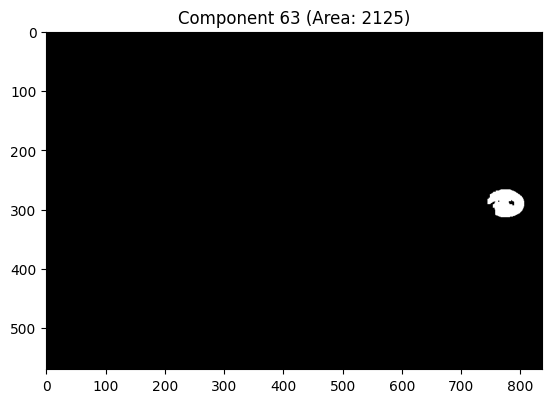

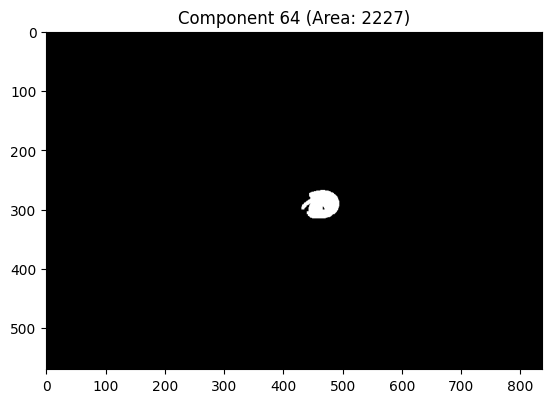

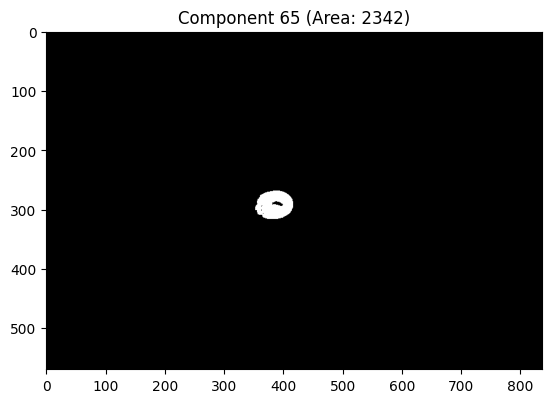

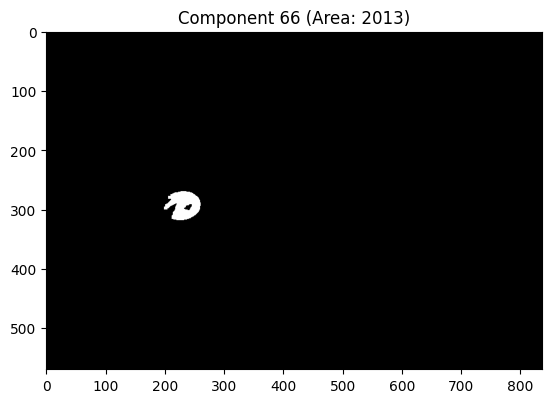

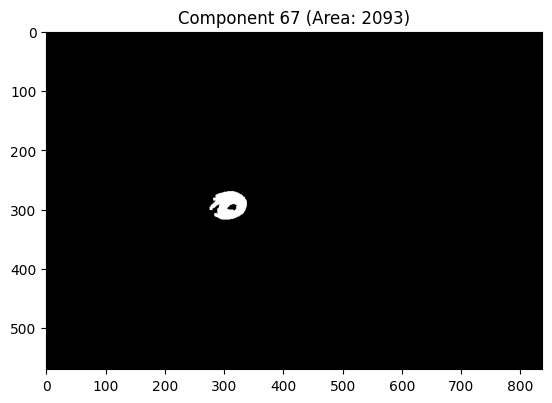

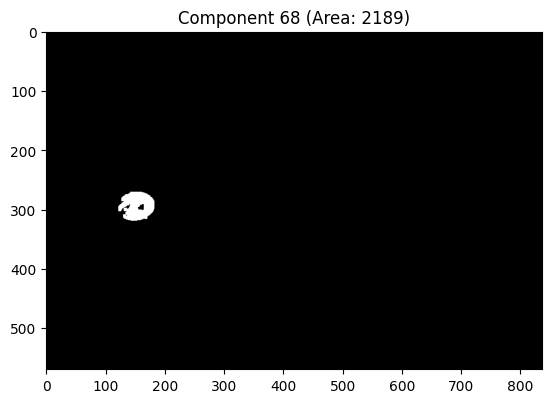

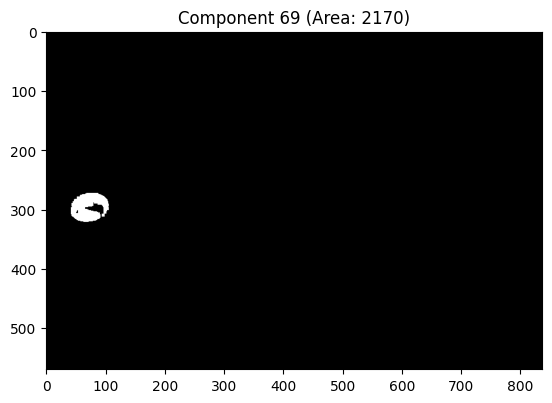

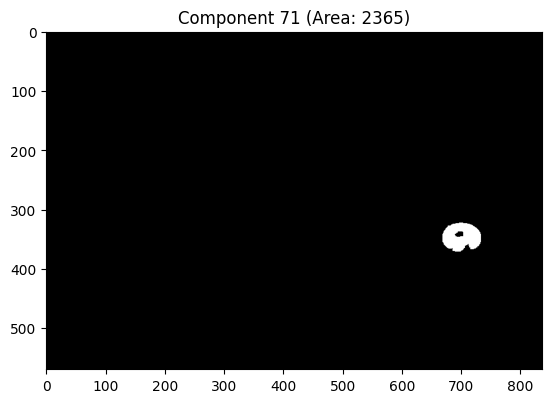

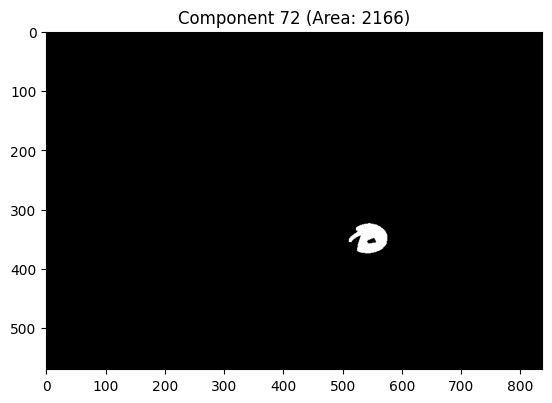

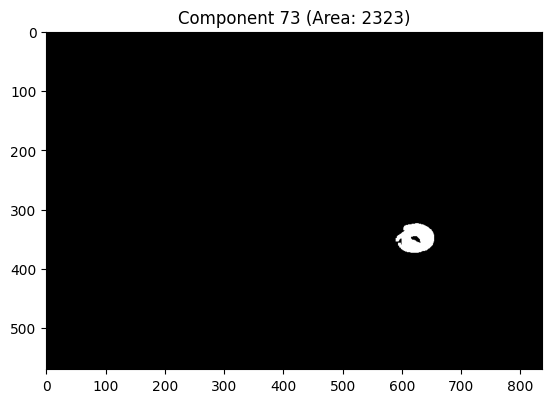

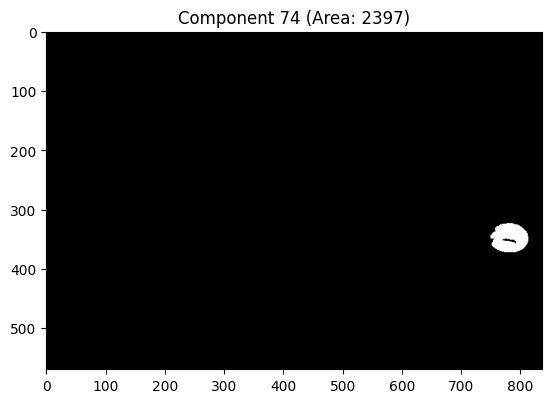

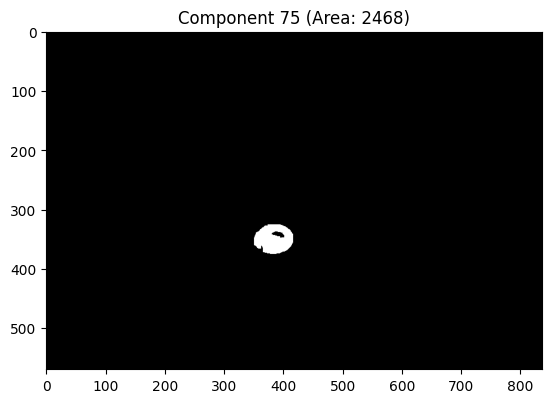

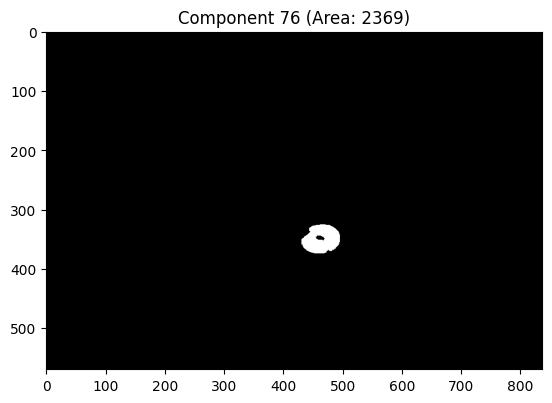

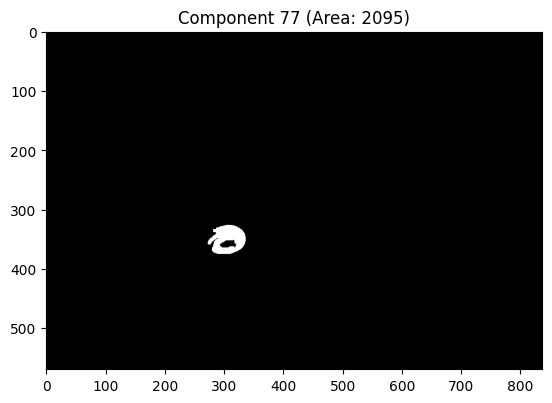

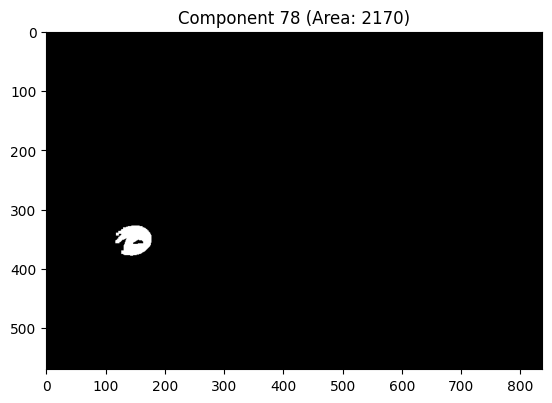

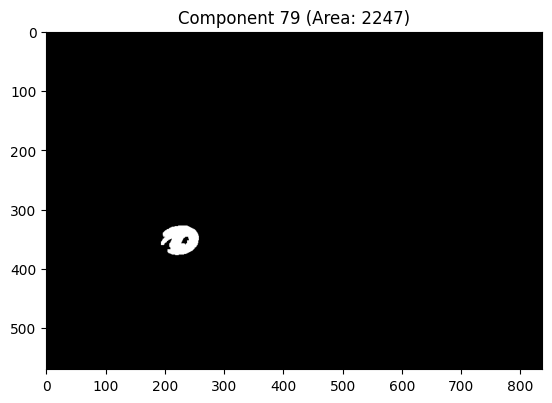

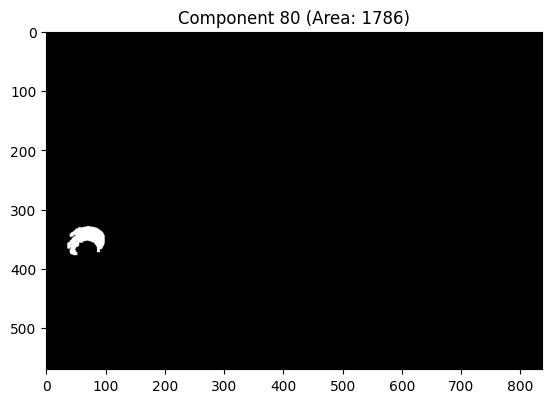

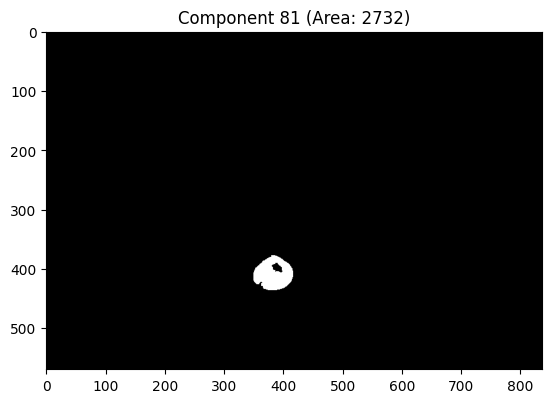

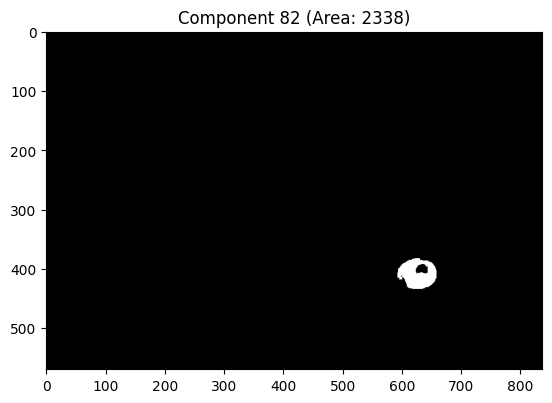

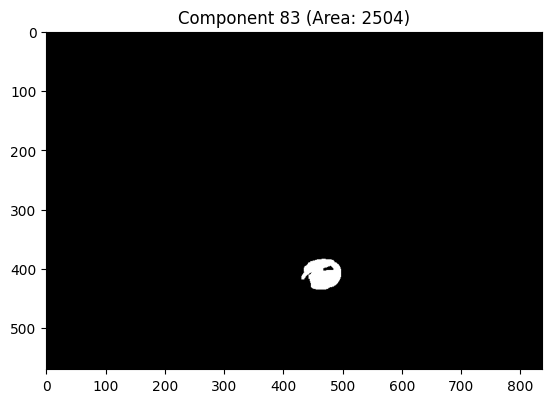

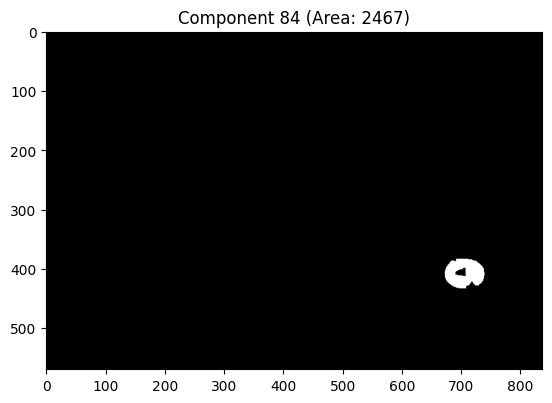

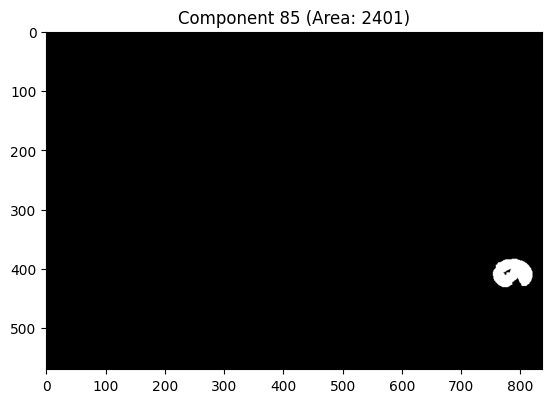

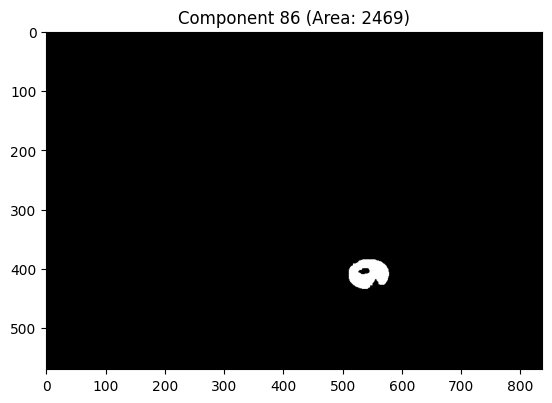

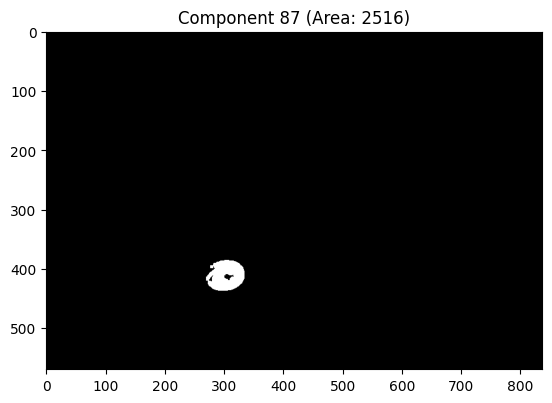

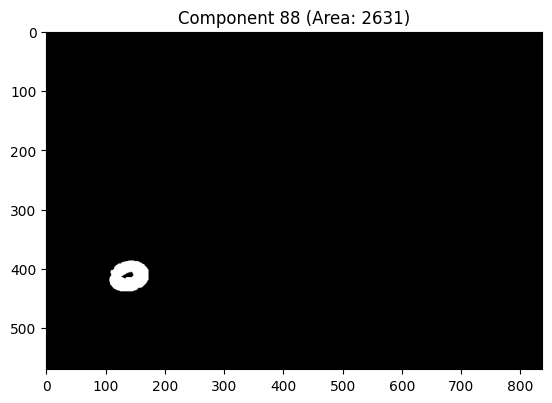

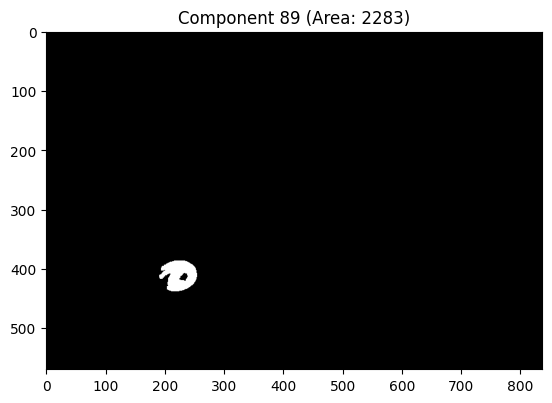

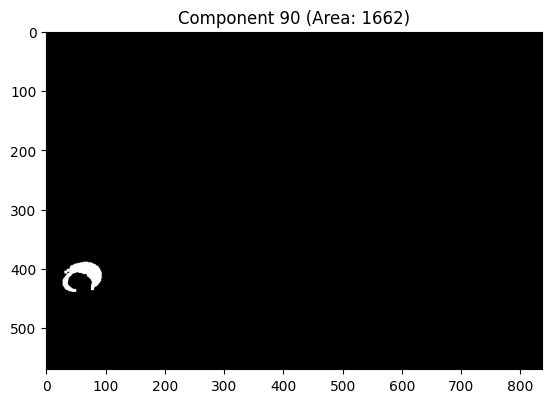

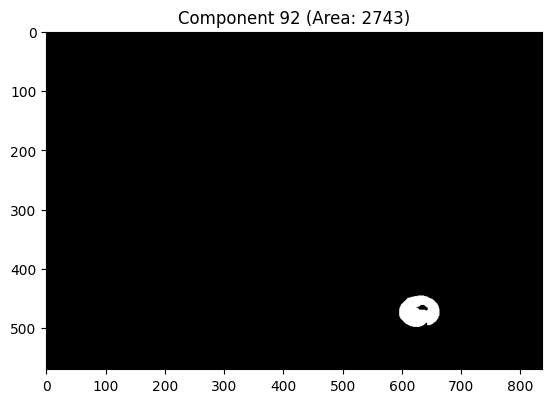

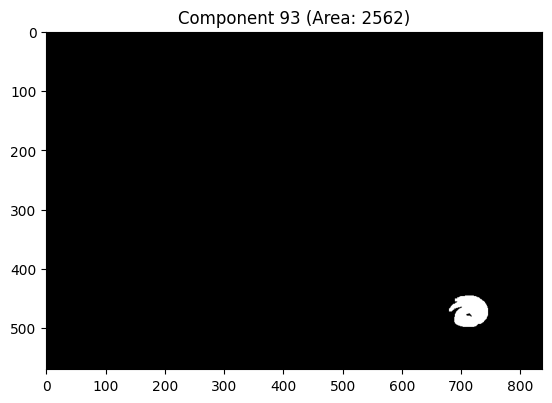

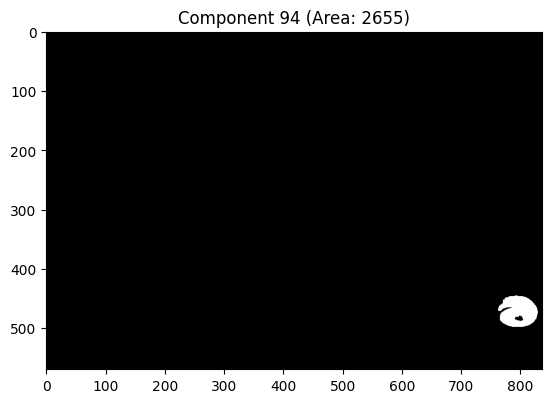

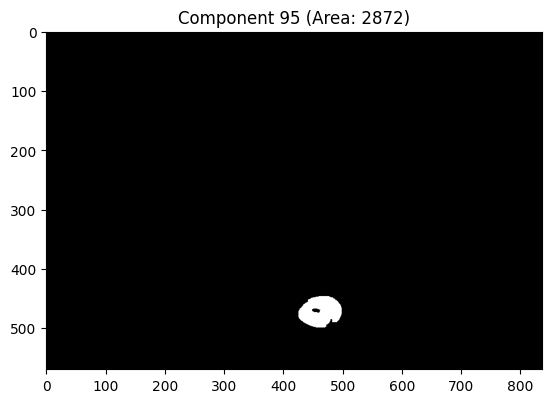

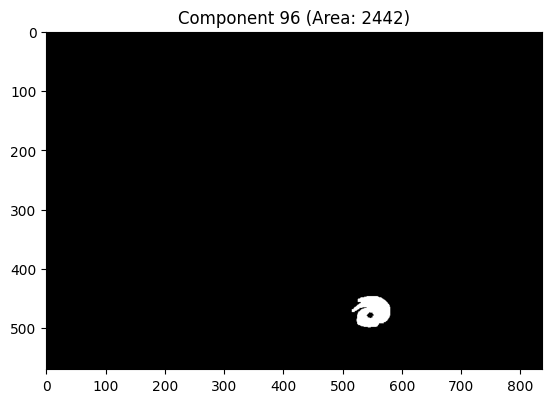

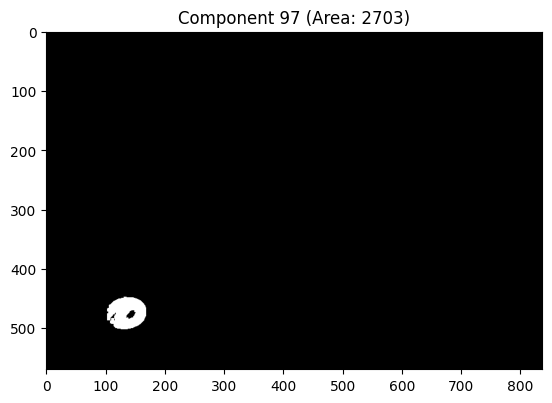

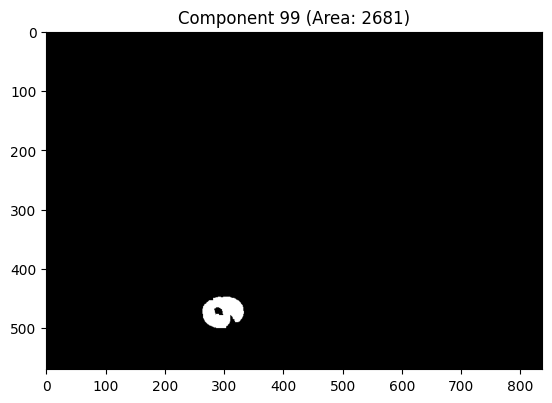

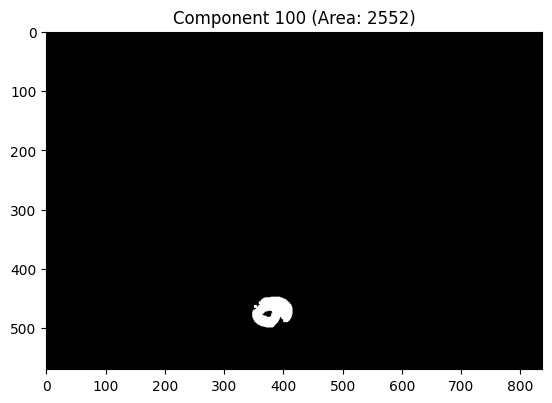

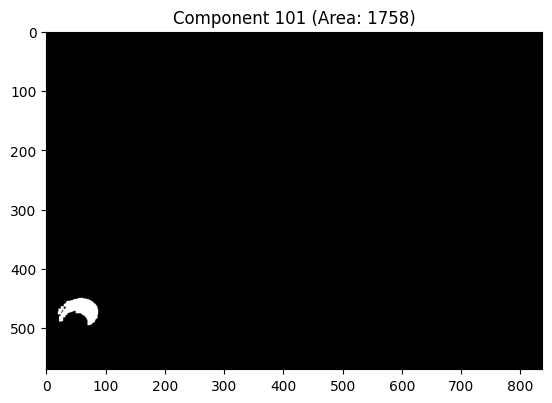

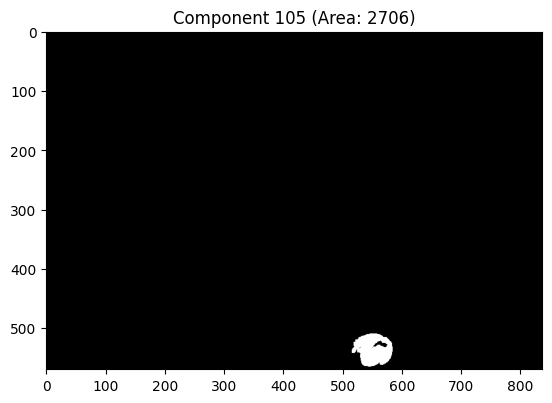

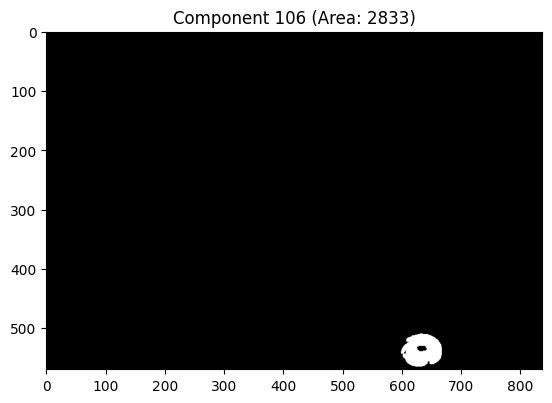

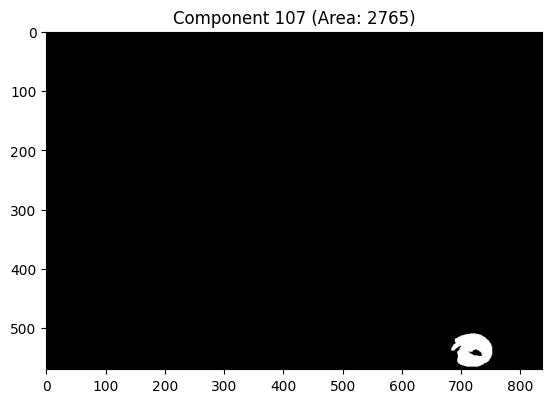

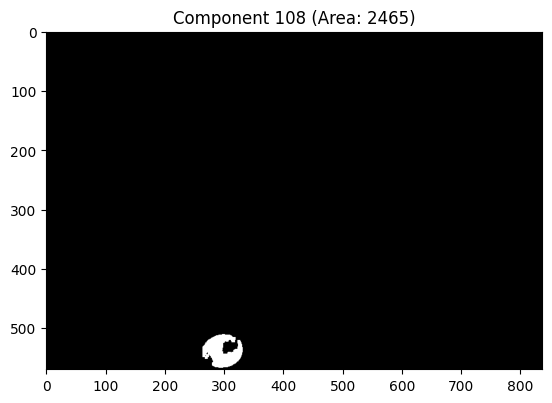

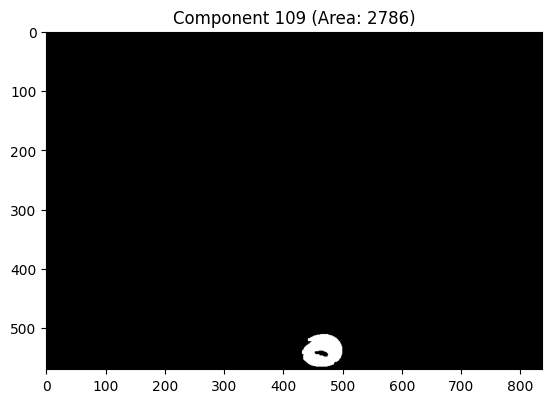

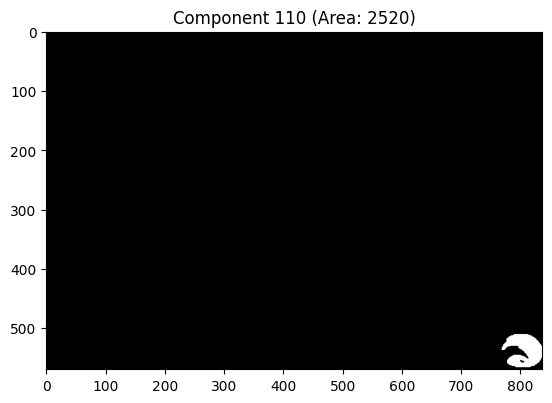

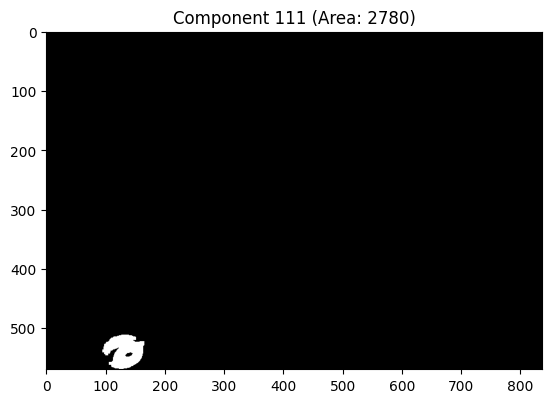

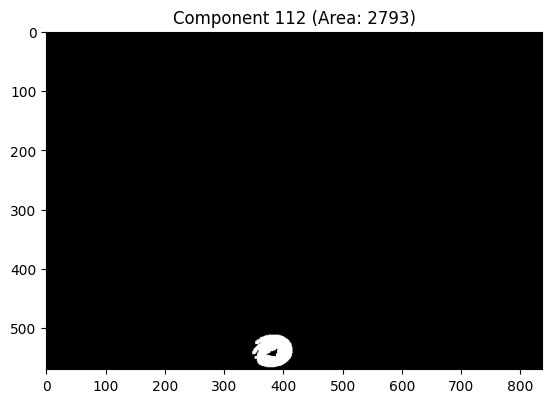

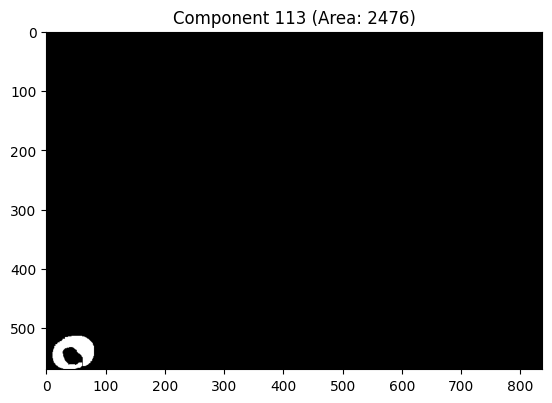

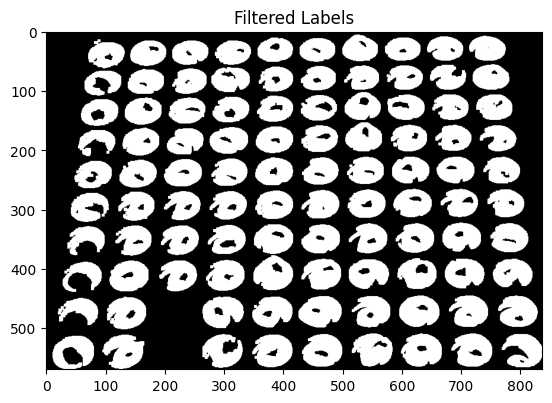

Total Imagenes = 98


In [41]:
num_labels, imgLabels, stats, centroids = cv.connectedComponentsWithStats(dilationcafe, connectivity=4)

# Definir un umbral mínimo de área
min_area = 500  # Ajusta este valor según tus necesidades

# Iterar sobre cada componente (excluyendo el fondo)
for i in range(1, num_labels):
    # Obtener el área del componente
    area = stats[i, cv.CC_STAT_AREA]

    # Si el área es mayor que el umbral, mostrar el componente
    if area >= min_area and area <= 5000:
        # Crear una máscara temporal para el componente actual
        component_mask = (imgLabels == i).astype('uint8') * 255

        # Mostrar el componente individualmente
        plt.imshow(component_mask, cmap='gray')
        plt.title(f'Component {i} (Area: {area})')
        plt.show()

# Si también deseas mostrar la imagen filtrada completa:
filtered_image = np.zeros_like(dilationcafe)

# Iterar sobre cada componente de nuevo para construir la imagen filtrada completa
contador_imagenes=0
for i in range(1, num_labels):
    area = stats[i, cv.CC_STAT_AREA]
    if area >= min_area and area <= 5000:
        contador_imagenes+=1
        component_mask = (imgLabels == i).astype('uint8') * 255
        filtered_image = cv.bitwise_or(filtered_image, component_mask)

plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Labels')
plt.show()
print(f"Total Imagenes = {contador_imagenes}")
